<a href="https://colab.research.google.com/github/nicholas-glanvill/wbs-pandas/blob/exploration/Intro%20to%20DataFrames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the Pandas library

With every new session, import Pandas to use it in your notebook.

The community agreed on using the alias `pd` for Pandas, so we will go with the convention.

In [ ]:
import pandas as pd

## 1. Creating a DataFrame


### 1.1 Creating an empty DataFrame

Sometimes we need an empty DataFrame: a named space where we can put some data later.

In [ ]:
df = pd.DataFrame() # notice the capitalization: pd.dataframe() will result in an error
print(df)

Empty DataFrame
Columns: []
Index: []


We can also specify which columns our DataFrame will have, but still leave the values empty.

In [ ]:
df = pd.DataFrame(columns=['Name', 'Age'])
print(df)

Empty DataFrame
Columns: [Name, Age]
Index: []


### 1.2. Creating a DataFrame from list of lists

One way to fill in a DataFrame upon creation is to use a list of lists. In this case, each *inner* list will become a *row* of the DataFrame. It is therefore important to ensure when using this method that each inner list has the same *length*.

If you don't specify the `columns` parameter, they will default to integers starting from 0.

In [ ]:
data = [['Alice', 25], ['Bob', 32], ['Charlie', 28]]

df = pd.DataFrame(data, columns=['Name', 'Age'])

df

,Name,Age
0,Alice,25
1,Bob,32
2,Charlie,28


### 1.3. Creating a DataFrame from a dictionary

When using a dictionary to create a DataFrame, each key-value pair will create a *column* of the DataFrame: the *key* will become the label for that column and the *values* will become the values of that column. Again, each collection of *values* in the dictionary will need to have the same *length*.

In [ ]:
data = {'Name': ['Alice', 'Bob', 'Charlie'],'Age': [25, 32, 28]}

df = pd.DataFrame(data)
df

,Name,Age
0,Alice,25
1,Bob,32
2,Charlie,28


### 1.4. Creating a DataFrame from .csv file

Depending if you work in Google Colab or in some local IDE (JupyterLab, VScode...), the way to read a .csv file is different. Both will use the same method from the Pandas library, but the way the file's *location* is given will change.

#### 1.4.1. Reading a .csv file from Google Colab

The best way to read a file is to upload it to your Drive. Follow the steps below to read it:
1. Upload the file to your Google Drive
2. Right-click on the file and go to "Share". Change sharing rights to "Anyone with the link" 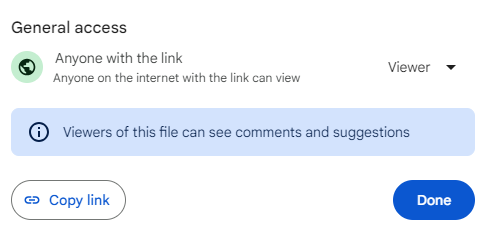
4. Copy the link
5. Paste the link in the `url` part of the code below. Be sure to leave the link as a string, i.e. it must be contained in quotes ' ' or " ".

In [ ]:
url = 'https://drive.google.com/file/d/18zYGrzRhn_mz1HJLXxSO_MwR0_nWBS3K/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

> ⚠️ **Don't change `path`**: For every new .csv file, you only need to change `url`. You can, of course, change the name of the variable `df` to something suitable as well.

#### 1.4.2. Reading a file from a JupyterLab or VS code

The file is located using the file system on your machine. This is also referred to as a path. One option is to use the *relative path*, which takes as reference where your notebook is located, as in the examples below:
  \
  \
-Folder1  
------notebook.ipynb  
------data.csv  
here the relative path is "data.csv"
  \
  \
-Folder1  
------notebook.ipynb  
------Folder2  
------------data.csv  
here the relative path is "Folder2/data.csv"
  \
 \
-Folder0  
------Folder1  
------------data.csv  
------Folder2  
------------notebook.ipynb  
here the relative path is "../Folder1/<wbr>data.csv"

The ".." in the last example means *go to the folder which contains this folder*. Starting from "Folder2" where the notebook is located, we travel first to the *parent directory* "Folder0", then locate "Folder1" inside it, followed by "data.csv" within that.

We can also use an *absolute path*, which can be useful if the data is stored somewhere not very close to the notebook being used. Such a path might look like: "C:/Desktop/data.csv"

In [ ]:
# this will not work in google colab so we will keep it commented

# notice that the file name is contained in quotes: it is a string
# df = pd.read_csv("data.csv")

> For other options, check this [file](https://colab.research.google.com/notebooks/io.ipynb).

## 2. Exploration
When you get new data, the first step is to explore and get an overview of the data.  
There are many methods and attributes of pandas `DataFrame` and `Series` that can help you with this task.

> **Reminder**:      
*methods* are built-in functions for data-classes. They are always called with parentheses () at the end, in which *arguments* can (or need to be) placed.      
>
> *attributes* are like sub-variables attached to a variable. They are called without parentheses.   
>
> It is normal to not remember at first if parentheses are needed or not when using these tools. Take notes, check notebooks or documentation; it comes with time.

##### 2.1. [**.info()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)
Use this method to review a concise summary of `df`:  

In [ ]:
# .info() is a method, and so requires parentheses
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

##### 2.2. [**shape**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html)
Use this attribute to see how many columns and rows `df` has:

In [ ]:
# .shape is an attribute, and thus is called without parentheses
df.shape

(35952, 15)

Since `df.shape` is a tuple, you can call its individual elements by their indexes.

In [ ]:
df.shape[0] # number of rows

35952

In [ ]:
df.shape[1] # number of columns

15

##### 2.3.  [**describe()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
Use this method to see certain statistics about `df`'s numeric columns:

In [ ]:
# .describe() is another method, and parentheses are needed
df.describe()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
count,35952.00000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000
mean,2000.71640,3.338493,5.765076,17.609056,17.646139,23.880646,19.929322,475.316339,1892.598465
std,10.08529,1.359395,1.755268,4.467283,4.769349,5.890876,5.112409,119.060773,506.958627
min,1984.00000,0.600000,2.000000,0.060000,6.000000,9.000000,7.000000,37.000000,600.000000
25%,1991.00000,2.200000,4.000000,14.699423,15.000000,20.000000,16.000000,395.000000,1500.000000
50%,2001.00000,3.000000,6.000000,17.347895,17.000000,24.000000,19.000000,467.736842,1850.000000
75%,2010.00000,4.300000,6.000000,20.600625,20.000000,27.000000,23.000000,555.437500,2200.000000
max,2017.00000,8.400000,16.000000,47.087143,58.000000,61.000000,56.000000,1269.571429,5800.000000


##### 2.4.  [**.head()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) and [**.tail()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html)
Use these methods to see the first or last rows, respectively, of `df`:

In [ ]:
df.head()   # without an argument, 5 rows will be returned

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [ ]:
df.tail()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.0,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.0,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.0,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.0,1100
35951,smart,fortwo coupe,2016,0.9,3.0,Manual 5-spd,Rear-Wheel Drive,Two Seaters,Premium,9.417429,32,39,35,255.0,1150


In [ ]:
# here we see .head() with an argument to specify its behaviour
df.head(1)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950


##### 2.5 [**\.columns**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html)
Use this method to see or rename (all of) `df`'s columns:

In [ ]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

##### 2.6 [**\.index**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html)
This method is like `.columns`, but orients instead on rows:

In [ ]:
df.index

RangeIndex(start=0, stop=35952, step=1)

##### 2.7 [**\.isnull()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html)
This method creates a `DataFrame` of
- `True` where the value is "missing" (`None` or `np.NaN`)
- `False` where the value is "not missing"

In [ ]:
df.isnull()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
35948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
35949,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
35950,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Since a DataFrame of `False` and `True` values is not the most convinient way to check for null values, we can use the `.sum()` method to count up all the `True` values. Since each missing (also called *null*) value returns as `True` (which evaluates as `1` to `False`'s `0`), the sum will effectively count the number of null values in a column.

In [ ]:
df.isnull().sum()

Make                       0
Model                      0
Year                       0
Engine Displacement        0
Cylinders                  0
Transmission               0
Drivetrain                 0
Vehicle Class              0
Fuel Type                  0
Fuel Barrels/Year          0
City MPG                   0
Highway MPG                0
Combined MPG               0
CO2 Emission Grams/Mile    0
Fuel Cost/Year             0
dtype: int64

This tells us that there are no null values `df`.

#### 2.8 Selecting a column

Often you need to see just one column of a DataFrame. To do this, use square brackets `[ ]` around the name of that column.

In [ ]:
df['Make']

0              AM General
1              AM General
2              AM General
3              AM General
4        ASC Incorporated
               ...       
35947               smart
35948               smart
35949               smart
35950               smart
35951               smart
Name: Make, Length: 35952, dtype: object

You may notice that this looks very different from `df`. This is because each column is itself a `Series`.

## 3. Series
Individual rows or columns of a DataFrame are `Series`. Series objects maintain the indexes of a DataFrame (row numbers for one column, or column names for one row). `Series` can also be constructed independently to store one-dimensional data with indexes.

Here you can check the official Pandas documentation on [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html).

In [ ]:
s = df['Make']

s

0              AM General
1              AM General
2              AM General
3              AM General
4        ASC Incorporated
               ...       
35947               smart
35948               smart
35949               smart
35950               smart
35951               smart
Name: Make, Length: 35952, dtype: object

`Series` and `DataFrame` share almost all the same methods. This is because many DataFrame methods are built on top of Series methods.

In [ ]:
s.head()

0          AM General
1          AM General
2          AM General
3          AM General
4    ASC Incorporated
Name: Make, dtype: object

In [ ]:
s.tail()

35947    smart
35948    smart
35949    smart
35950    smart
35951    smart
Name: Make, dtype: object

They also have a lot of same attributes

In [ ]:
s.index

RangeIndex(start=0, stop=35952, step=1)

In [ ]:
s.shape

(35952,)

#### .name
One attribute unique to Series is `.name`. When taken from a `DataFrame`, the `.name` of a `Series` will be the *label* (column name or row index) of the data taken.

In [ ]:
# remember, s was created from the column 'Make' in the dataframe df
s.name

'Make'

## 4. Challenges

#### 4.1
You are given a dictionary containing information about fruits. Create a DataFrame from this dictionary and display it.

In [ ]:
fruit_data = {
    'Fruit': ['Apple', 'Banana', 'Orange', 'Grapes'],
    'Color': ['Red', 'Yellow', 'Orange', 'Purple'],
    'Taste': ['Sweet', 'Sweet', 'Sweet', 'Sweet'],
    'Price': [1.0, 0.5, 0.8, 2.5]
}

In [ ]:
# Your code here

#### 4.2.
You are given a list of lists containing information about cities. Each inner list represents the data for a single city: the city's **name**, **population**, and **country**.     
Create a DataFrame from this list of lists and display the result.

In [ ]:
city_data = [
    ['New York', 8175133, 'USA'],
    ['Tokyo', 13929286, 'Japan'],
    ['London', 8908081, 'UK'],
    ['Mumbai', 12442373, 'India']
]


In [ ]:
# Your code here

#### 4.3
Download the .csv file from this [link](https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv).   
Save the .csv file on your Google Drive.  
Following the instructions from section 1.4 of this notebook, create a DataFrame with this data.

In [ ]:
# Your code here

#### 4.4
Explore the DataFrame and Series (any column you wish) from the previous exercise using all the methods and attributes learned in this notebook (info, shape, describe, head, tail, columns, index).

In [ ]:
# Your code here

#### 4.5. Learn more about DataFrame
Try some of the other DataFrame methods and attributes like: \
 \

.dtypes: Attribute to display data types of each column.   
.sample(): Method to obtain a random sample of `n` rows, default `1`.  
.nunique(): Method to count the number of unique values in *each column*.  
.value_counts(): Method to display the frequency of unique values. Best used on a *single column*.  
.max(): Method to get the maximum value of each column.  
.min(): Method to get the minimum value of each column.  
.mean(): Method to calculate the mean of each *numeric column*.  
.median(): Method to calculate the median of each *numeric column*.  
.std(): Method to calculate the standard deviation of each *numeric column*.  
.isnull(): Method to check for missing values in the DataFrame.  
.notnull(): Method to check for non-missing values in the DataFrame. The boolean inverse of `.isnull()`.  

In [ ]:
# your code here

#### 4.6 Learn more about Series
Visit the official documentation on [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) and try as many attributes and methods you wish.  
There is an LMS page about Pandas documentation that you can find [here](https://learn.wbscodingschool.com/topic/pandas-documentation/).

In [ ]:
# your code here

###### Hint

In [ ]:
# To create a Series, select one column of a DataFrame and save the result

# my_series = df[______]